In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [82]:
plt.rcParams['figure.figsize'] = [8, 4]

In [83]:
host = 'influxdb'
port = 8086
user = 'root'
password = 'root'
dbname = 'testdb'
client = DataFrameClient(host, port, user, password, dbname)

In [84]:
tmp=client.query('select * from Temperature')
print(tmp)
tmp['Temperature']

defaultdict(<class 'list'>, {'Temperature':                              location  \
1990-01-01 00:30:00+00:00  MyBuilding   
1990-01-01 00:30:00+00:00  MyBuilding   
1990-01-01 00:30:00+00:00  MyBuilding   
1990-01-01 00:30:00+00:00  MyBuilding   
1990-01-01 00:30:00+00:00  MyBuilding   
...                               ...   
2030-12-31 10:00:00+00:00  MyBuilding   
2030-12-31 12:00:00+00:00  MyBuilding   
2030-12-31 12:00:00+00:00  MyBuilding   
2030-12-31 13:00:00+00:00  MyBuilding   
2030-12-31 13:00:00+00:00  MyBuilding   

                                                                        node  \
1990-01-01 00:30:00+00:00                                              T_out   
1990-01-01 00:30:00+00:00                                    Tin_CorridorX1f   
1990-01-01 00:30:00+00:00                                    Tin_CorridorX2f   
1990-01-01 00:30:00+00:00                                   Tin_OfficeXNEX1f   
1990-01-01 00:30:00+00:00                                   Tin

,location,node,value
1990-01-01 00:30:00+00:00,MyBuilding,T_out,0.000000
1990-01-01 00:30:00+00:00,MyBuilding,Tin_CorridorX1f,0.000000
1990-01-01 00:30:00+00:00,MyBuilding,Tin_CorridorX2f,0.000000
1990-01-01 00:30:00+00:00,MyBuilding,Tin_OfficeXNEX1f,0.000000
1990-01-01 00:30:00+00:00,MyBuilding,Tin_OfficeXNEX2f,0.000000
...,...,...,...
2030-12-31 10:00:00+00:00,MyBuilding,BLOCK2:OFFICEXSWX2F:Zone Mean Radiant Temperat...,30.320104
2030-12-31 12:00:00+00:00,MyBuilding,Environment:Site Outdoor Air Dewpoint Temperat...,7.400000
2030-12-31 12:00:00+00:00,MyBuilding,Environment:Site Outdoor Air Drybulb Temperatu...,18.800000
2030-12-31 13:00:00+00:00,MyBuilding,Environment:Site Outdoor Air Dewpoint Temperat...,7.800000


In [85]:
tmp = tmp['Temperature'].pivot(columns='node',values='value')
tmp

node,BLOCK1:CORRIDORX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:CORRIDORX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:CORRIDORX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXSEX1F:Zone Mean Air Temperature [C](TimeStep:ON),...,Tin_CorridorX2f,Tin_OfficeXNEX1f,Tin_OfficeXNEX2f,Tin_OfficeXNWX1f,Tin_OfficeXNWX2f,Tin_OfficeXSEX1f,Tin_OfficeXSEX2f,Tin_OfficeXSWX1f,Tin_OfficeXSWX2f,reward
1990-01-01 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1990-01-01 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1990-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1990-01-01 01:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1990-01-01 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030-12-31 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030-12-31 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030-12-31 10:00:00+00:00,NaN,28.004493,NaN,NaN,25.886423,NaN,NaN,25.886423,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030-12-31 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
tmp.index = pd.to_datetime(tmp.index)
temp = tmp[tmp.index > "1994-01-01 00:10:00+00:00"]
temp = temp[temp.index < "1995-01-01 00:10:00+00:00"]


In [87]:
temp

node,BLOCK1:CORRIDORX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:CORRIDORX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:CORRIDORX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNEX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Mean Air Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Mean Radiant Temperature [C](TimeStep:ON),BLOCK1:OFFICEXNWX1F:Zone Operative Temperature [C](TimeStep:ON),BLOCK1:OFFICEXSEX1F:Zone Mean Air Temperature [C](TimeStep:ON),...,Tin_CorridorX2f,Tin_OfficeXNEX1f,Tin_OfficeXNEX2f,Tin_OfficeXNWX1f,Tin_OfficeXNWX2f,Tin_OfficeXSEX1f,Tin_OfficeXSEX2f,Tin_OfficeXSWX1f,Tin_OfficeXSWX2f,reward
1994-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-12-31 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-12-31 17:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df = pd.DataFrame()
df["T_out"] = temp["T_out"]

# List of indoor temperature columns from 8 rooms
room_temp_columns = [
            'T_Block1_OfficeXSWX1f',
            'T_Block1_OfficeXSEX1f',
            'T_Block1_OfficeXNWX1f',
            'T_Block1_OfficeXNEX1f',
            'T_Block1_CorridorX1f',
            'T_Block2_OfficeXSWX2f',
            'T_Block2_OfficeXSEX2f',
            'T_Block2_OfficeXNWX2f',
            'T_Block2_OfficeXNEX2f',
            'T_Block2_CorridorX2f',
]

# Calculate the mean indoor temperature and add it to df1
df["T_in"] = temp[room_temp_columns].mean(axis=1)



# Optional: View the result
df

,T_out,T_in
1994-01-01 01:00:00+00:00,14.2,26.903300
1994-01-01 02:00:00+00:00,NaN,27.768567
1994-01-01 04:00:00+00:00,12.5,25.770611
1994-01-01 05:00:00+00:00,12.2,26.305273
1994-01-01 06:00:00+00:00,12.0,26.175209
...,...,...
1994-12-31 13:00:00+00:00,19.8,26.623214
1994-12-31 14:00:00+00:00,20.3,26.850871
1994-12-31 15:00:00+00:00,20.2,26.982979
1994-12-31 17:00:00+00:00,NaN,26.844128


In [89]:
tmp=client.query('select * from Power')
tmp=tmp['Power'].pivot(columns='node',values='value') 
tmp.index = pd.to_datetime(tmp.index)
temp = tmp[tmp.index > "1994-01-01 00:10:00+00:00"]
temp = temp[temp.index < "1995-01-01 00:10:00+00:00"]
temp

node,BLOCK1:CORRIDORX1F EQUIPMENT GAIN:Other Equipment Electricity Rate [W](TimeStep),BLOCK1:CORRIDORX1F:Zone Ventilation Fan Electricity Energy [J](TimeStep),BLOCK1:OFFICEXNEX1F EQUIPMENT GAIN:Other Equipment Electricity Rate [W](TimeStep),BLOCK1:OFFICEXNEX1F:Zone Ventilation Fan Electricity Energy [J](TimeStep),BLOCK1:OFFICEXNWX1F EQUIPMENT GAIN:Other Equipment Electricity Rate [W](TimeStep),BLOCK1:OFFICEXNWX1F:Zone Ventilation Fan Electricity Energy [J](TimeStep),BLOCK1:OFFICEXSEX1F EQUIPMENT GAIN:Other Equipment Electricity Rate [W](TimeStep),BLOCK1:OFFICEXSEX1F:Zone Ventilation Fan Electricity Energy [J](TimeStep),BLOCK1:OFFICEXSWX1F EQUIPMENT GAIN:Other Equipment Electricity Rate [W](TimeStep),BLOCK1:OFFICEXSWX1F:Zone Ventilation Fan Electricity Energy [J](TimeStep),...,ELECTRIC EQUIPMENT#Block2:OfficeXNEX2f#GeneralLights:InteriorLights:Electricity [J](TimeStep),ELECTRIC EQUIPMENT#Block2:OfficeXNWX2f#GeneralLights:InteriorLights:Electricity [J](TimeStep),ELECTRIC EQUIPMENT#Block2:OfficeXSEX2f#GeneralLights:InteriorLights:Electricity [J](TimeStep),ELECTRIC EQUIPMENT#Block2:OfficeXSWX2f#GeneralLights:InteriorLights:Electricity [J](TimeStep),Electricity,Electricity:Facility,Electricity:Facility [J](TimeStep),InteriorLights:Electricity [J](TimeStep),Whole Building:Facility Total Produced Electricity Energy [J](TimeStep),reward
1994-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
1994-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.316474e+06,NaN,NaN,NaN,NaN,NaN
1994-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.316474e+06,NaN,NaN,NaN,NaN,NaN
1994-01-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.316474e+06,NaN,NaN,NaN,NaN,NaN
1994-01-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.316474e+06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-12-31 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.392005e+07,NaN,NaN,NaN,NaN,NaN
1994-12-31 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.797335e+07,NaN,NaN,NaN,NaN,NaN
1994-12-31 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.797335e+07,NaN,NaN,NaN,NaN,NaN
1994-12-31 17:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.042734e+07,NaN,NaN,NaN,NaN,NaN


In [90]:
df['Power']=tmp['Electricity']
df.head()

,T_out,T_in,Power
1994-01-01 01:00:00+00:00,14.2,26.903300,0.000000e+00
1994-01-01 02:00:00+00:00,NaN,27.768567,1.316474e+06
1994-01-01 04:00:00+00:00,12.5,25.770611,NaN
1994-01-01 05:00:00+00:00,12.2,26.305273,1.316474e+06
1994-01-01 06:00:00+00:00,12.0,26.175209,1.316474e+06


In [91]:
# Drop rows with any NaN values
df.dropna(inplace=True)

In [92]:
df['deltaT']=df.T_in-df.T_out
df.head()

,T_out,T_in,Power,deltaT
1994-01-01 01:00:00+00:00,14.2,26.903300,0.000000e+00,12.703300
1994-01-01 05:00:00+00:00,12.2,26.305273,1.316474e+06,14.105273
1994-01-01 06:00:00+00:00,12.0,26.175209,1.316474e+06,14.175209
1994-01-01 07:00:00+00:00,12.0,26.060790,1.316474e+06,14.060790
1994-01-01 08:00:00+00:00,12.9,27.416907,6.582372e+06,14.516907


In [93]:
df=df.dropna()

#ali's edition

<Figure size 800x400 with 0 Axes>

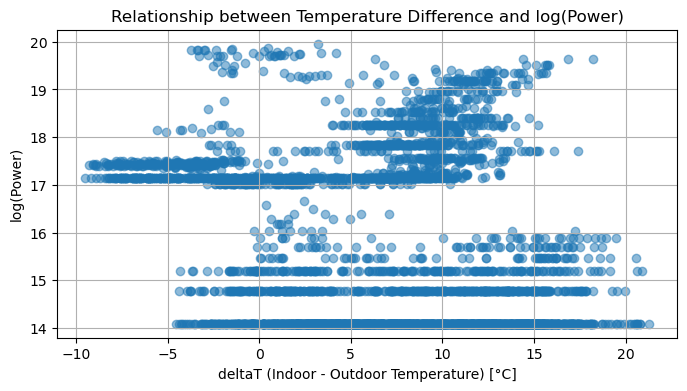

=== Full Data Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:              log_Power   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           5.80e-50
Time:                        12:45:26   Log-Likelihood:                -8480.3
No. Observations:                4367   AIC:                         1.696e+04
Df Residuals:                    4365   BIC:                         1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

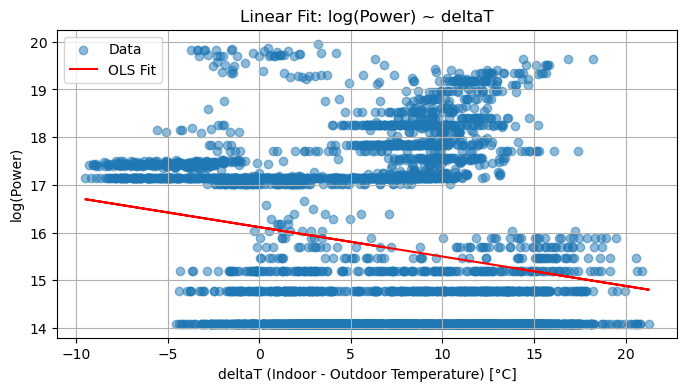


=== Filtered Data Regression Summary (log_Power > 14) ===
                            OLS Regression Results                            
Dep. Variable:              log_Power   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           5.80e-50
Time:                        12:45:27   Log-Likelihood:                -8480.3
No. Observations:                4367   AIC:                         1.696e+04
Df Residuals:                    4365   BIC:                         1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

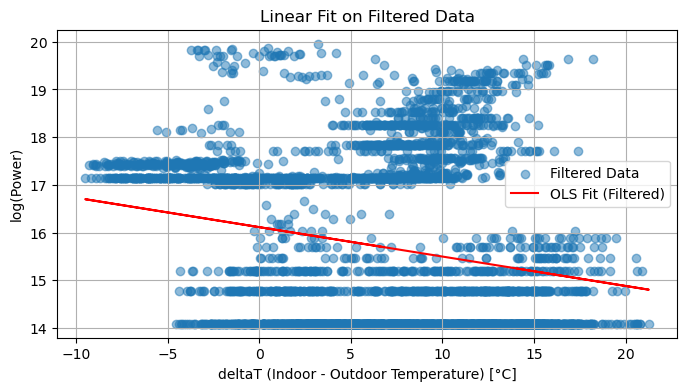

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.figure(figsize=(8, 4))
# Step 1: Drop any rows with non-positive Power values
df = df[df['Power'] > 0].dropna(subset=['deltaT', 'Power'])

# Step 2: Compute log(Power)
df['log_Power'] = np.log(df['Power'])

# Step 3: Initial Scatter Plot
plt.figure(figsize=(8, 4))
plt.scatter(df['deltaT'], df['log_Power'], alpha=0.5)
plt.xlabel('deltaT (Indoor - Outdoor Temperature) [°C]')
plt.ylabel('log(Power)')
plt.title('Relationship between Temperature Difference and log(Power)')
plt.grid(True)
plt.show()

# Step 4: Linear Regression on Full Dataset
plt.figure(figsize=(8, 4))
X = sm.add_constant(df['deltaT'])  # Add intercept
y = df['log_Power']
model = sm.OLS(y, X)
results = model.fit()
print("=== Full Data Regression Summary ===")
print(results.summary())
plt.figure(figsize=(8, 4))
# Step 5: Plot Regression Line
plt.figure(figsize=(8, 4))
plt.scatter(df['deltaT'], df['log_Power'], alpha=0.5, label='Data')
plt.plot(df['deltaT'], results.predict(X), 'r', label='OLS Fit')
plt.xlabel('deltaT (Indoor - Outdoor Temperature) [°C]')
plt.ylabel('log(Power)')
plt.title('Linear Fit: log(Power) ~ deltaT')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Filter Flat/Low-Power States (optional)
df_filtered = df[df['log_Power'] > 14]  # You can tune this threshold

# Step 7: Linear Regression on Filtered Data
Xf = sm.add_constant(df_filtered['deltaT'])
yf = df_filtered['log_Power']
model_f = sm.OLS(yf, Xf).fit()

print("\n=== Filtered Data Regression Summary (log_Power > 14) ===")
print(model_f.summary())

# Step 8: Optional: Plot for filtered fit
plt.figure(figsize=(8, 4))
plt.scatter(df_filtered['deltaT'], df_filtered['log_Power'], alpha=0.5, label='Filtered Data')
plt.plot(df_filtered['deltaT'], model_f.predict(Xf), 'r', label='OLS Fit (Filtered)')
plt.xlabel('deltaT (Indoor - Outdoor Temperature) [°C]')
plt.ylabel('log(Power)')
plt.title('Linear Fit on Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:              log_Power   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     116.4
Date:                Fri, 30 May 2025   Prob (F-statistic):           5.57e-50
Time:                        12:45:27   Log-Likelihood:                -8477.3
No. Observations:                4367   AIC:                         1.696e+04
Df Residuals:                    4364   BIC:                         1.698e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1036      0.037    429.796      0.0

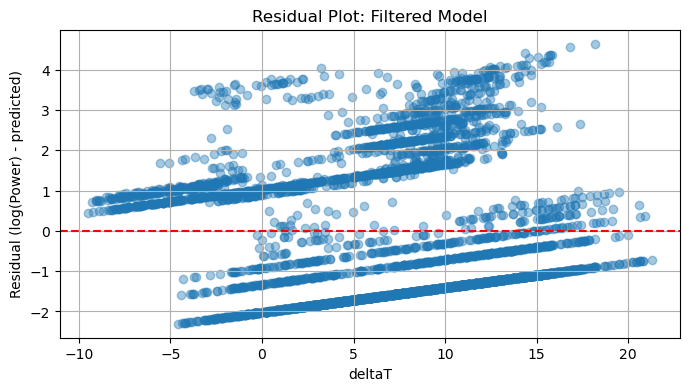

In [95]:
from numpy.polynomial.polynomial import Polynomial
poly_features = np.column_stack((df['deltaT'], df['deltaT']**2))
X_poly = sm.add_constant(poly_features)
model_poly = sm.OLS(df['log_Power'], X_poly).fit()
print(model_poly.summary())


residuals = model_f.resid
plt.figure(figsize=(8, 4))
plt.scatter(df_filtered['deltaT'], residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Filtered Model')
plt.xlabel('deltaT')
plt.ylabel('Residual (log(Power) - predicted)')
plt.grid(True)
plt.show()


Ends of ali's edition

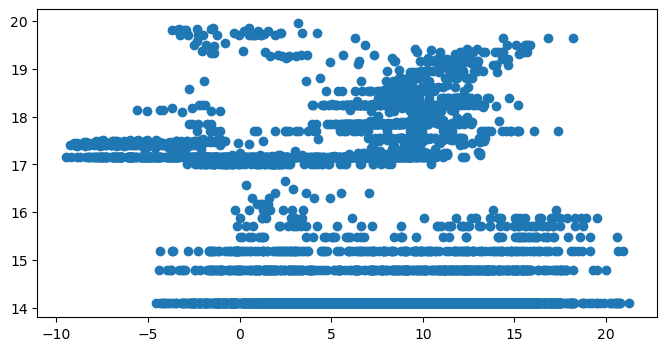

In [96]:
plt.scatter(df.deltaT, np.log(df.Power))

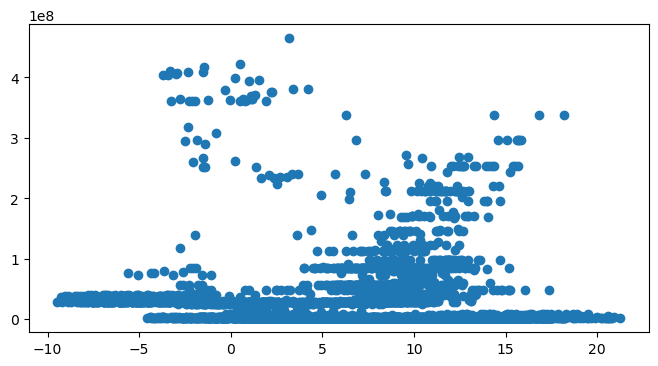

In [97]:
plt.scatter(df.deltaT,df.Power)

In [98]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [99]:
results=model.fit()

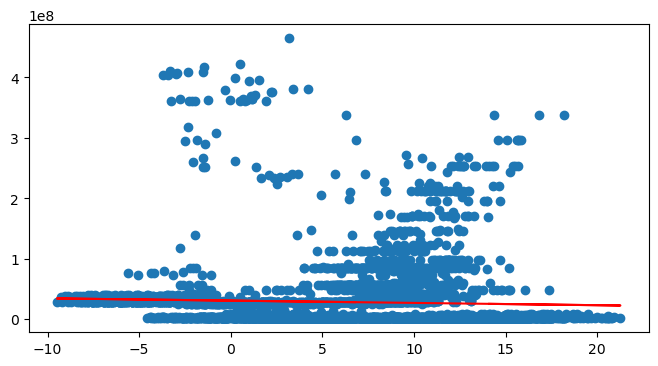

In [100]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.997
Date:                Fri, 30 May 2025   Prob (F-statistic):            0.00471
Time:                        12:45:27   Log-Likelihood:                -84050.
No. Observations:                4367   AIC:                         1.681e+05
Df Residuals:                    4365   BIC:                         1.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.055e+07   1.22e+06     25.034      0.000    2.82e+07    3.29e+07
deltaT     -3.792e+05   1.34e+05     -2.828      0.005   -6.42e+05   -1.16e+05
==============================================================================
Omnibus:                     3492.540   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66220.763
Skew:                           3.836   Prob(JB):                         0.00
Kurtosis:                      20.466   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
df=df.resample('H').mean()
df=df.dropna()

/tmp/ipykernel_30/836416887.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df=df.resample('H').mean()


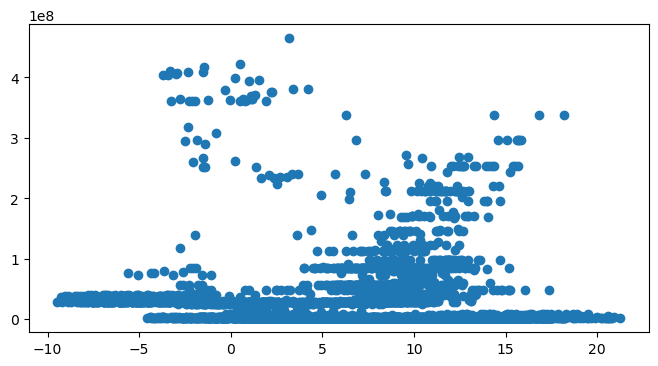

In [103]:
plt.scatter(df.deltaT,df.Power)

In [104]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [105]:
results=model.fit()

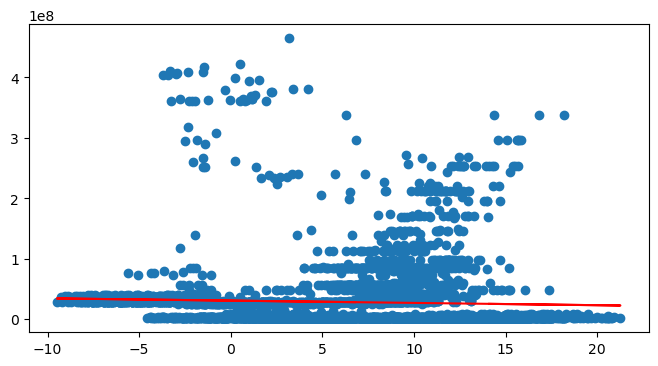

In [106]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [107]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.997
Date:                Fri, 30 May 2025   Prob (F-statistic):            0.00471
Time:                        12:45:28   Log-Likelihood:                -84050.
No. Observations:                4367   AIC:                         1.681e+05
Df Residuals:                    4365   BIC:                         1.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.055e+07   1.22e+06     25.034      0.000    2.82e+07    3.29e+07
deltaT     -3.792e+05   1.34e+05     -2.828      0.005   -6.42e+05   -1.16e+05
==============================================================================
Omnibus:                     3492.540   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66220.763
Skew:                           3.836   Prob(JB):                         0.00
Kurtosis:                      20.466   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
df=df.resample('D').mean()
df=df.dropna()

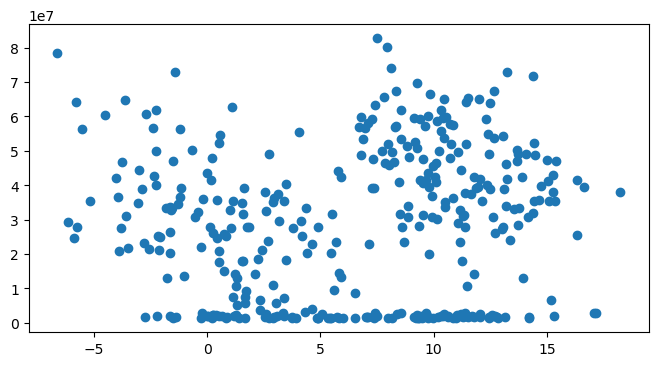

In [109]:
plt.scatter(df.deltaT,df.Power)

In [110]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [111]:
results=model.fit()

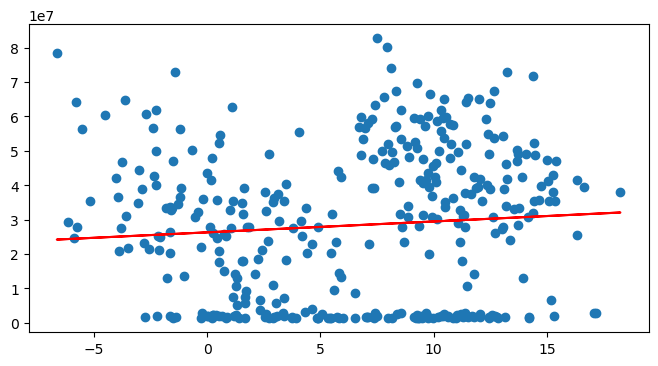

In [112]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [113]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.545
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.111
Time:                        12:45:28   Log-Likelihood:                -6681.6
No. Observations:                 365   AIC:                         1.337e+04
Df Residuals:                     363   BIC:                         1.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.63e+07    1.7e+06     15.436      0.000    2.29e+07    2.96e+07
deltaT      3.163e+05   1.98e+05      1.595      0.111   -7.36e+04    7.06e+05
==============================================================================
Omnibus:                       87.242   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.391
Skew:                           0.178   Prob(JB):                     0.000102
Kurtosis:                       1.960   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
df=df.resample('W').mean()
df=df.dropna()

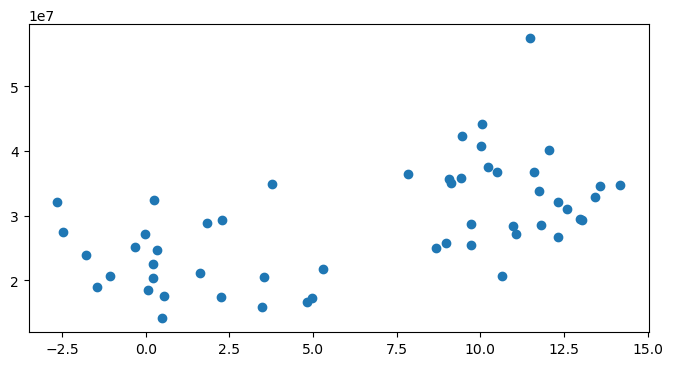

In [115]:
plt.scatter(df.deltaT,df.Power)


In [116]:
model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [117]:
results=model.fit()

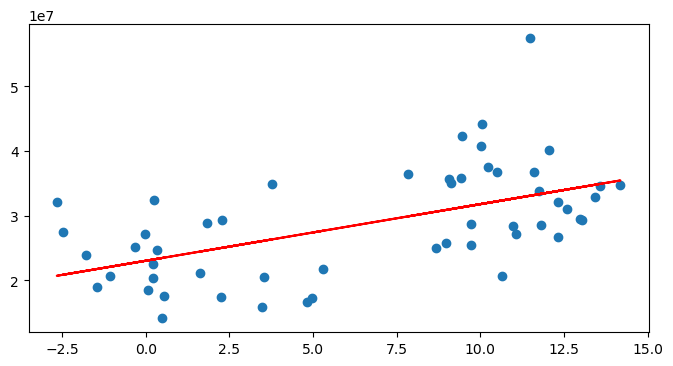

In [118]:
plt.plot(df.deltaT,results.predict(),'r')
plt.scatter(df.deltaT,df.Power)

In [119]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     22.31
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.86e-05
Time:                        12:45:29   Log-Likelihood:                -910.60
No. Observations:                  53   AIC:                             1825.
Df Residuals:                      51   BIC:                             1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.302e+07   1.55e+06     14.815      0.000    1.99e+07    2.61e+07
deltaT      8.751e+05   1.85e+05      4.723      0.000    5.03e+05    1.25e+06
==============================================================================
Omnibus:                        8.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.742
Skew:                           0.790   Prob(JB):                       0.0208
Kurtosis:                       4.005   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""